# MNIST 50

Nesse notebook irei aplicar um PCA para reduzir a dimensionalidade do MNIST, para 50, e após isso udar outras técnicas de redução. 

O objetivo é poder analizar a precisão da acurácia e também da qualidade da redução. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.spatial.distance import pdist


from sortedness import sortedness, global_pwsortedness

from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits


from sklearn.preprocessing import StandardScaler

import umap
from sklearn.manifold  import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,Isomap
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix

#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machines (SVM):
from sklearn.svm import SVC
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
#Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB
#AdaBoost:
from sklearn.ensemble import AdaBoostClassifier
#MLP
from sklearn.neural_network import MLPClassifier

## Fazendo as reduções

In [2]:
digits = load_digits()

X = digits['data']
y = digits['target']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Xs.shape

(1797, 64)

In [4]:
pca = PCA(n_components=50)
pca.fit(Xs)
Xs_pca50 = pca.transform(Xs)

In [ ]:
Xs_pca50_aux = np.array(Xs_pca50, dtype=np.float16)


In [3]:
n_components = 2

In [5]:
start_time = time.time()

pca = PCA(n_components=n_components)
pca.fit(Xs)
Xs_pca = pca.transform(Xs)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução PCA:", execution_time, "segundos")

Tempo de execução PCA: 0.0324251651763916 segundos


In [7]:
start_time = time.time()
mds = MDS(n_components=n_components, random_state=42)
Xs_mds = mds.fit_transform(Xs)
end_time = time.time()

execution_time = end_time - start_time
print("Tempo de execução MDS:", execution_time, "segundos")

/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Tempo de execução MDS: 109.56830430030823 segundos


In [8]:
start_time = time.time()

ica = FastICA(n_components=n_components)
ica.fit(Xs)
Xs_ica = ica.transform(Xs)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução ICA:", execution_time, "segundos")

/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Tempo de execução ICA: 0.2968130111694336 segundos


In [9]:
start_time = time.time()

isomap = Isomap(n_components=n_components)
Xs_isomap = isomap.fit_transform(Xs)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução Isomap:", execution_time, "segundos")

Tempo de execução Isomap: 1.8296287059783936 segundos


In [10]:
start_time = time.time()

tsne = TSNE(random_state = 42, n_components=n_components,verbose=0, perplexity=40, n_iter=300)
Xs_tsne = tsne.fit_transform(Xs)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução t-SNE:", execution_time, "segundos")

Tempo de execução t-SNE: 8.805965185165405 segundos


In [11]:
start_time = time.time()

umap_model = umap.UMAP(n_components=n_components)
Xs_umap = umap_model.fit_transform(Xs)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução UMAP:", execution_time, "segundos")

Tempo de execução UMAP: 9.469252824783325 segundos


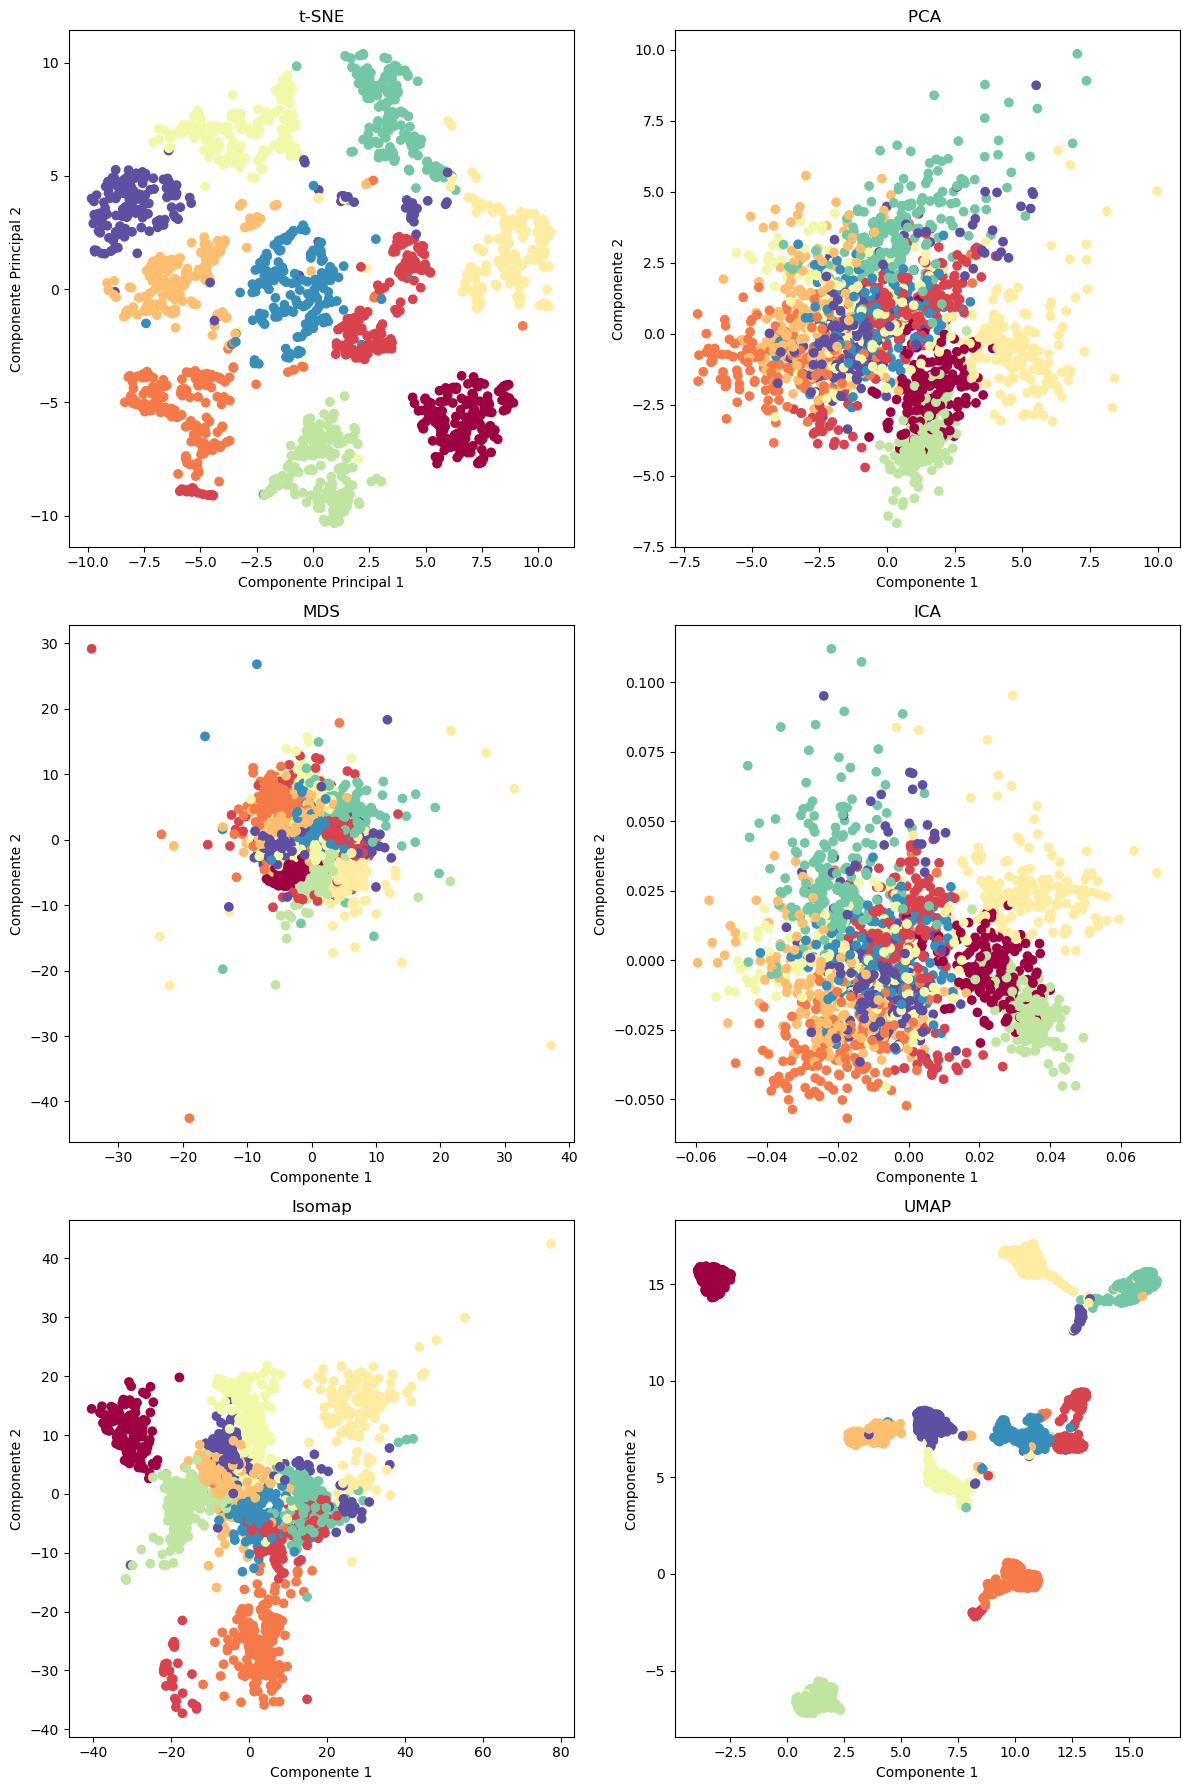

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12,18))

axes[0][0].scatter(Xs_tsne[:, 0], Xs_tsne[:, 1], c=np.array(y).astype(int), cmap='Spectral')
axes[0][0].set_xlabel('Componente Principal 1')
axes[0][0].set_ylabel('Componente Principal 2')
axes[0][0].set_title('t-SNE')

axes[0][1].scatter(Xs_pca[:, 0], Xs_pca[:, 1], c=np.array(y).astype(int), cmap='Spectral')
axes[0][1].set_xlabel('Componente 1')
axes[0][1].set_ylabel('Componente 2')
axes[0][1].set_title('PCA ')

axes[1][0].scatter(Xs_mds[:, 0], Xs_mds[:, 1],c=np.array(y).astype(int), cmap='Spectral')
axes[1][0].set_xlabel('Componente 1')
axes[1][0].set_ylabel('Componente 2')
axes[1][0].set_title('MDS')

axes[1][1].scatter(Xs_ica[:, 0], Xs_ica[:, 1], c=np.array(y).astype(int), cmap='Spectral')
axes[1][1].set_xlabel('Componente 1')
axes[1][1].set_ylabel('Componente 2')
axes[1][1].set_title('ICA')

axes[2][0].scatter(Xs_isomap[:, 0], Xs_isomap[:, 1], c=np.array(y).astype(int), cmap='Spectral')
axes[2][0].set_xlabel('Componente 1')
axes[2][0].set_ylabel('Componente 2')
axes[2][0].set_title('Isomap')

axes[2][1].scatter(Xs_umap[:, 0], Xs_umap[:, 1], c=np.array(y).astype(int), cmap='Spectral')
axes[2][1].set_xlabel('Componente 1')
axes[2][1].set_ylabel('Componente 2')
axes[2][1].set_title('UMAP')

plt.tight_layout()

plt.show()

## Aplicando os algorimtmos

In [30]:
def usando_algoritmos(X, y, alg_names, algs):

    start_time = time.time()
    mean_value = []
    for alg_name in alg_names:
        scores_list = []
        cm_list = []

        alg = algs[alg_name]
        cv = KFold(n_splits=5, random_state=0, shuffle=True)

        # Executar a validação cruzada e obter as pontuações de validação cruzada
        scores = cross_val_score(alg, X, y, cv=cv, scoring="accuracy")
        scores_list.append(scores)

        scores_array = np.array(scores_list)
        # Calcular a média das pontuações
        mean_scores = np.mean(scores_array)
        mean_value.append(round(mean_scores,3)*100)
        # Calcular o desvio padrão das pontuações
        std_scores = np.std(scores_array)

        # Fazer previsões usando o algo
        y_pred = cross_val_predict(alg, X, y, cv=cv)

        # Calcular a matriz de confusão
        cm = confusion_matrix(y, y_pred)
        cm_list.append(cm)

        end_time = time.time()
        duration = end_time - start_time
        # Reinicia o tempo de início para o próximo loop
        start_time = time.time()


        print("Algoritmo:", alg_name)
        print(f"Tempo: {round(duration, 3)} segundos")
        print("Pontuações de Validação Cruzada:", [round(score, 3) for score in scores])
        print("Média das Pontuações:", round(mean_scores,3))
        # print("Desvio Padrão das Pontuações:",round(std_scores,3))
        # print("Matriz de Confusão:")
        # print(cm)
        print("-------------------------------------")


    return mean_value



In [24]:
def print_mean(mean_values):
    print('Valores médios:')
    mean_values = np.array(mean_values)
    for mean in mean_values:
        print(mean)

In [28]:
class MyActLearning():

    def __init__(self, n_iterations=5, k_samples=10):
        self.n_iterations = n_iterations
        self.k_samples = k_samples
        self.classifier = LogisticRegression(random_state=42, max_iter=1000)
    
    def fit(self, X_pool, y_pool):
        test_size_aux = X_pool.shape[0] - (0+1)*10
        X_train, X_val, y_train, y_val = train_test_split(X_pool, y_pool, test_size=test_size_aux, random_state=42)

        for i in range(self.n_iterations):
            model = self.classifier.fit(X_train, y_train)
            y_pred = self.classifier.predict(X_val)

            acc = accuracy_score(y_pred, y_val)

            #print(f'Interation {i}: acc = {round(acc,3)*100.}')

            # Obter as probabilidades das classes para o conjunto de teste
            probabilities = model.predict_proba(X_val)

            # Calcular a diferença entre as probabilidades das classes
            differences = np.abs(probabilities[:, 0] - probabilities[:, 1])

            # Ordenar os exemplos pelo valor absoluto da diferença (do menor para o maior)
            sorted_indices = np.argsort(differences)

            # Exibir os 10 exemplos mais incertos
            most_uncertain_indices = sorted_indices[:self.k_samples]

            X_train = np.concatenate((X_train, X_val[most_uncertain_indices]))
            y_train = np.concatenate((y_train, y_val[most_uncertain_indices]))

            X_val = np.delete(X_val, most_uncertain_indices, axis=0)
            y_val = np.delete(y_val, most_uncertain_indices)
    
    def get_params(self, deep=True):
        # Retorna os parâmetros do estimador em um dicionário
        return {"n_iterations": self.n_iterations, "k_samples": self.k_samples}
    
    def predict(self, X):
        y_pred = self.classifier.predict(X)
        return y_pred

In [21]:
algs = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'MLPClassifier':MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'MyActLearning':MyActLearning(n_iterations=17)
}

In [22]:
alg_names=['LogisticRegression','SVC','RandomForestClassifier',
            'KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier',
            'GaussianNB', 'AdaBoostClassifier', 'MLPClassifier','MyActLearning']

In [31]:
X_reduction = [Xs, Xs_pca, Xs_mds, Xs_ica, Xs_isomap, Xs_tsne, Xs_umap]
reduction_names = ['Sem Redução', 'PCA', 'MDS', 'ICA', 'Isomap', 't-SNE', 'Umap']


In [32]:
for i in range(len(X_reduction)):
    print(f'######{reduction_names[i]}#######')
    resultados  = usando_algoritmos(Xs, y,alg_names, algs)
    print_mean(resultados)



######Sem Redução#######
Algoritmo: LogisticRegression
Tempo: 3.136 segundos
Pontuações de Validação Cruzada: [0.961, 0.961, 0.981, 0.972, 0.972]
Média das Pontuações: 0.969
-------------------------------------
Algoritmo: SVC
Tempo: 0.884 segundos
Pontuações de Validação Cruzada: [0.981, 0.986, 0.986, 0.972, 0.983]
Média das Pontuações: 0.982
-------------------------------------
Algoritmo: RandomForestClassifier
Tempo: 2.918 segundos
Pontuações de Validação Cruzada: [0.972, 0.972, 0.983, 0.961, 0.969]
Média das Pontuações: 0.972
-------------------------------------
Algoritmo: KNeighborsClassifier
Tempo: 0.292 segundos
Pontuações de Validação Cruzada: [0.972, 0.975, 0.986, 0.972, 0.978]
Média das Pontuações: 0.977
-------------------------------------
Algoritmo: DecisionTreeClassifier
Tempo: 0.255 segundos
Pontuações de Validação Cruzada: [0.842, 0.853, 0.864, 0.872, 0.858]
Média das Pontuações: 0.858
-------------------------------------
Algoritmo: GradientBoostingClassifier
Tempo: 

In [34]:
for i in range(len(X_reduction)):
    score = sortedness(Xs, X_reduction[i])
    score2 = global_pwsortedness(Xs, X_reduction[i])

    print(f"Sortedness {reduction_names[i]}:", round(score[0],3))
    print(f"Global Sortedness {reduction_names[i]}:", round(score2[0],3))
    print('----------------------------------------------------')

Sortedness Sem Redução: 1.0
Global Sortedness Sem Redução: 1.0
----------------------------------------------------
Sortedness PCA: 0.678
Global Sortedness PCA: 0.467
----------------------------------------------------
Sortedness MDS: 0.842
Global Sortedness MDS: 0.605
----------------------------------------------------
Sortedness ICA: 0.678
Global Sortedness ICA: 0.464
----------------------------------------------------
Sortedness Isomap: 0.787
Global Sortedness Isomap: 0.327
----------------------------------------------------
Sortedness t-SNE: 0.669
Global Sortedness t-SNE: 0.282
----------------------------------------------------
Sortedness Umap: 0.772
Global Sortedness Umap: 0.189
----------------------------------------------------
